In [1]:
#Instalacaicón de paquetes
!pip install spacepy
!pip install cdflib
!pip install matplotlib

In [2]:
#Instalación de librerías
from spacepy import pycdf
import cdflib
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
import math
from mpl_toolkits.mplot3d import axes3d, Axes3D
import matplotlib.ticker as ticker
import numpy as np
#dmsp-f16_ssm_magnetometer_20130601_v1.0.4.cdf
![Binder](https://mybinder.org/badge_logo.svg)(https://mybinder.org/v2/gh/lkilcommons/OvationPyme/HEAD?labpath=notebooks%2FInteractiveWithHemisphericPower.ipynb)

"[Binder]" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.


In [3]:
#Carga de archivo de datos de flujo de sátelite DMSP
archivo = cdflib.CDF('dmsp-f16_ssjs_precipitating-electrons-ions_20130531000000_20130531230000_cdaweb.cdf')
info = archivo.cdf_info()

#Lectura de variables
tiempo = archivo.varget('Epoch') #Tiempo
ION_TOTAL_ENERGY_FLUX = archivo.varget('ION_TOTAL_ENERGY_FLUX') #Flujo total de iones
CHANNEL_ENERGIES = archivo.varget('CHANNEL_ENERGIES') #Energía de los canales
ION_DIFF_ENERGY_FLUX = archivo.varget('ION_DIFF_ENERGY_FLUX') #Flujo de energía diferencial de iones
SC_GEOCENTRIC_LAT = archivo.varget('SC_GEOCENTRIC_LAT') #Latitud geocéntrica


tiempo_final = cdflib.cdfepoch.to_datetime(tiempo) #Conversión de tiempo a formato de fecha 

C:\Users\benja\AppData\Local\Temp\ipykernel_30848\228761793.py:14: RuntimeWarning: divide by zero encountered in log10
  log_ION_DIFF_ENERGY_FLUX = np.log10(ION_DIFF_ENERGY_FLUX)


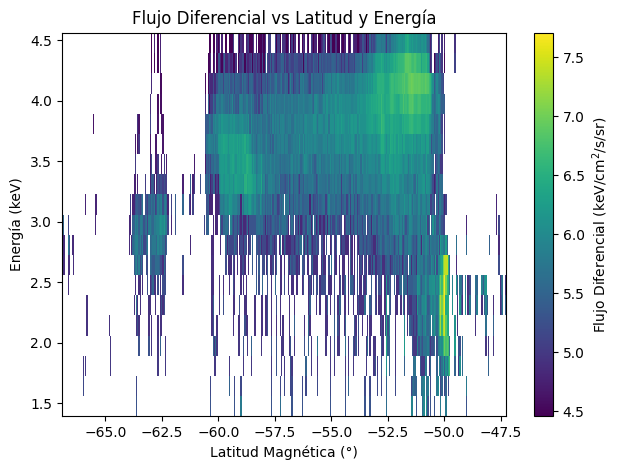

In [ ]:
# Graficamos el flujo diferencial de iones en función de la latitud y la energía
SC_GEOCENTRIC_LAT = np.nan_to_num(SC_GEOCENTRIC_LAT, nan=0.0, posinf=0.0, neginf=0.0) # Latitud magnética
CHANNEL_ENERGIES = np.nan_to_num(CHANNEL_ENERGIES, nan=0.0, posinf=0.0, neginf=0.0)   # Energías en keV
ION_DIFF_ENERGY_FLUX = np.nan_to_num(ION_DIFF_ENERGY_FLUX, nan=0.0, posinf=0.0, neginf=0.0) # Flujo diferencial de iones

N1,N2=79300,79650 # Rango de datos a graficar

# Aplicamos la transformación logarítmica a los datos
log_CHANNEL_ENERGIES= np.log10(CHANNEL_ENERGIES)
log_ION_DIFF_ENERGY_FLUX = np.log10(ION_DIFF_ENERGY_FLUX)
Traslog_ION_DIFF_ENERGY_FLUX=np.transpose(log_ION_DIFF_ENERGY_FLUX[N1:N2])

#norm = Normalize(vmin=0, vmax=np.max(ION_DIFF_ENERGY_FLUX))
heatmap = plt.pcolormesh(SC_GEOCENTRIC_LAT[N1:N2],log_CHANNEL_ENERGIES,Traslog_ION_DIFF_ENERGY_FLUX, cmap="viridis", shading='auto')


# Añadimos la barra de color
cbar = plt.colorbar(heatmap, orientation='vertical')
cbar.set_label("Flujo Diferencial (keV/cm$^2$/s/sr)")
cbar.ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x:.1f}'))
plt.xlabel("Latitud Magnética (°)")
plt.ylabel("Energía (keV)")
plt.title("Flujo Diferencial vs Latitud y Energía")

# Mostramos el gráfico
plt.tight_layout()
plt.show()

-52.99417813916294


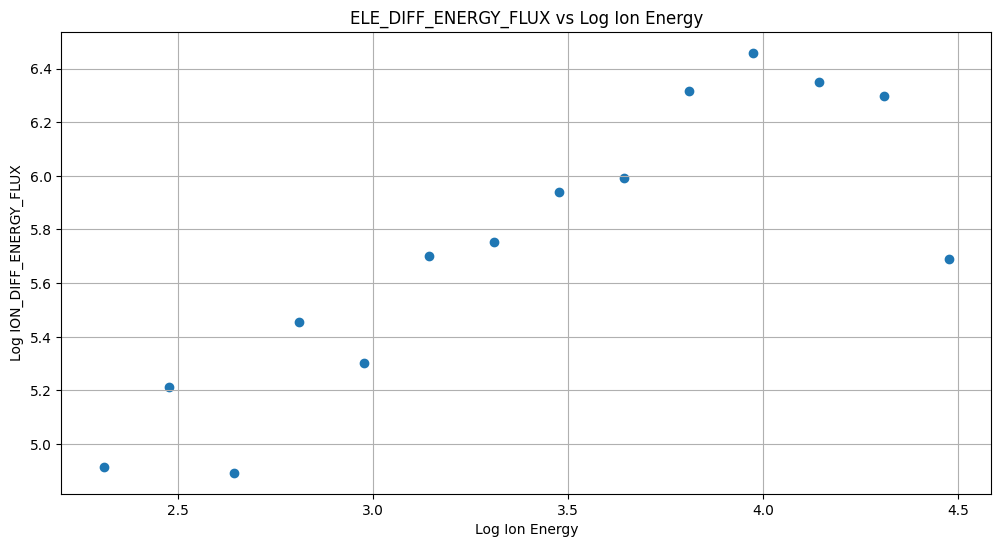

In [ ]:
NS=79400 #espectro buscado}

print(SC_GEOCENTRIC_LAT[NS]) #Latitud

plt.figure(figsize=(12, 6))
plt.scatter(log_CHANNEL_ENERGIES, log_ION_DIFF_ENERGY_FLUX[NS], linestyle='-', marker='o')
plt.title('Espectro de Energía de Iones')
plt.xlabel('Log Ion Energy')
plt.ylabel('Log ION_DIFF_ENERGY_FLUX')
plt.grid()
plt.show()


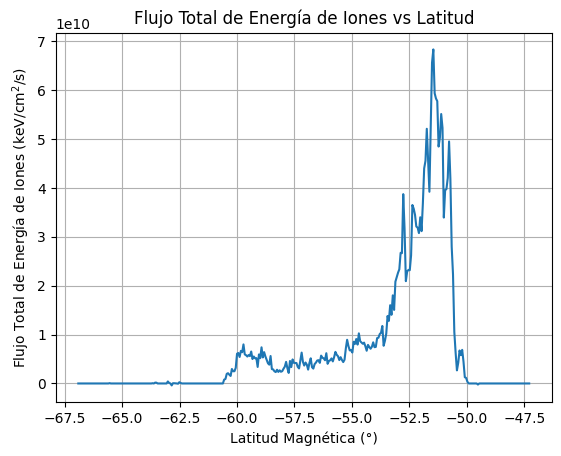

b2i se encuentra en la latitud mágnetica -51.457° y en el tiempo 2013-05-31T22:02:53.000000000


In [7]:
#Calculo FLUJO TOTAL DE ENERGÍA DE IONES

# Define los límites de energía (Ev)
Ec2 = CHANNEL_ENERGIES[:17]  # Energías de canal superior.
Ec1 = CHANNEL_ENERGIES[1:18]  # Energías de canal inferior.

# Calcula los anchos de las bandas energéticas
delta = [(e2 - e1) / 2 for e1, e2 in zip(Ec1, Ec2)] # Calcula el ancho de las bandas energéticas.
Left = CHANNEL_ENERGIES[1] - CHANNEL_ENERGIES[0]  # Extremo izquierdo.
Rigth = CHANNEL_ENERGIES[17] - CHANNEL_ENERGIES[16]  # Extremo derecho.
delta.insert(0, Left)  # Añade el intervalo izquierdo.
delta.append(Rigth)  # Añade el intervalo derecho.

# Busqueda de la forntera b2i

flujos =[] # Lista para almacenar los flujos de energía en cada banda.

# Continua con el cálculo
for elem in ION_DIFF_ENERGY_FLUX: # Itera sobre los flujos de energía diferencial.
    flujos.append(sum(elem[0:6] * np.array(delta[0:6]))) # Suma los flujos de energía en cada banda.

TOTAL_ION_ENERGY_FLUX_30_30000 = (flujos) # Suma los flujos de energía en cada banda.

plt.plot(SC_GEOCENTRIC_LAT[N1:N2], TOTAL_ION_ENERGY_FLUX_30_30000[N1:N2])
plt.xlabel('Latitud Magnética (°)')
plt.ylabel('Flujo Total de Energía de Iones (keV/cm$^2$/s)')
plt.title('Flujo Total de Energía de Iones vs Latitud')
plt.grid()
plt.show()


# Calculo de la latitud y tiempo en el que se presenta el máximo flujo de energía de iones (b21)
maxb2i=TOTAL_ION_ENERGY_FLUX_30_30000[N1:N2].index(max(TOTAL_ION_ENERGY_FLUX_30_30000[N1:N2]))
b2i=(SC_GEOCENTRIC_LAT[N1:N2][maxb2i])

print(f"b2i se encuentra en la latitud mágnetica {b2i:.3f}° y en el tiempo {tiempo_final[N1:N2][maxb2i]}")


